# 2120203 Tutorial Project

This is Tutorial Project for 2102203 Probability and Statistics for Electrical Engineering 2023

Main Goal:
- Understand how to get data from API or Web Scraping
- Can compute some basic statistical parameters from the obtained data

---------------------------
This notebook was created by Patchapong Kulthumrongkul (12 October 2023)

You're welcome to use this tutorial as a guide for your project, **but it's essential to provide appropriate citations**

## Dependencies
The libraries required to import before beginning the project

In [2]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

## Method 1 Gather data from API

### Data Gathering
For more information about datasource: https://open-meteo.com/en/docs/historical-weather-api

You can try to see the original form of data through url below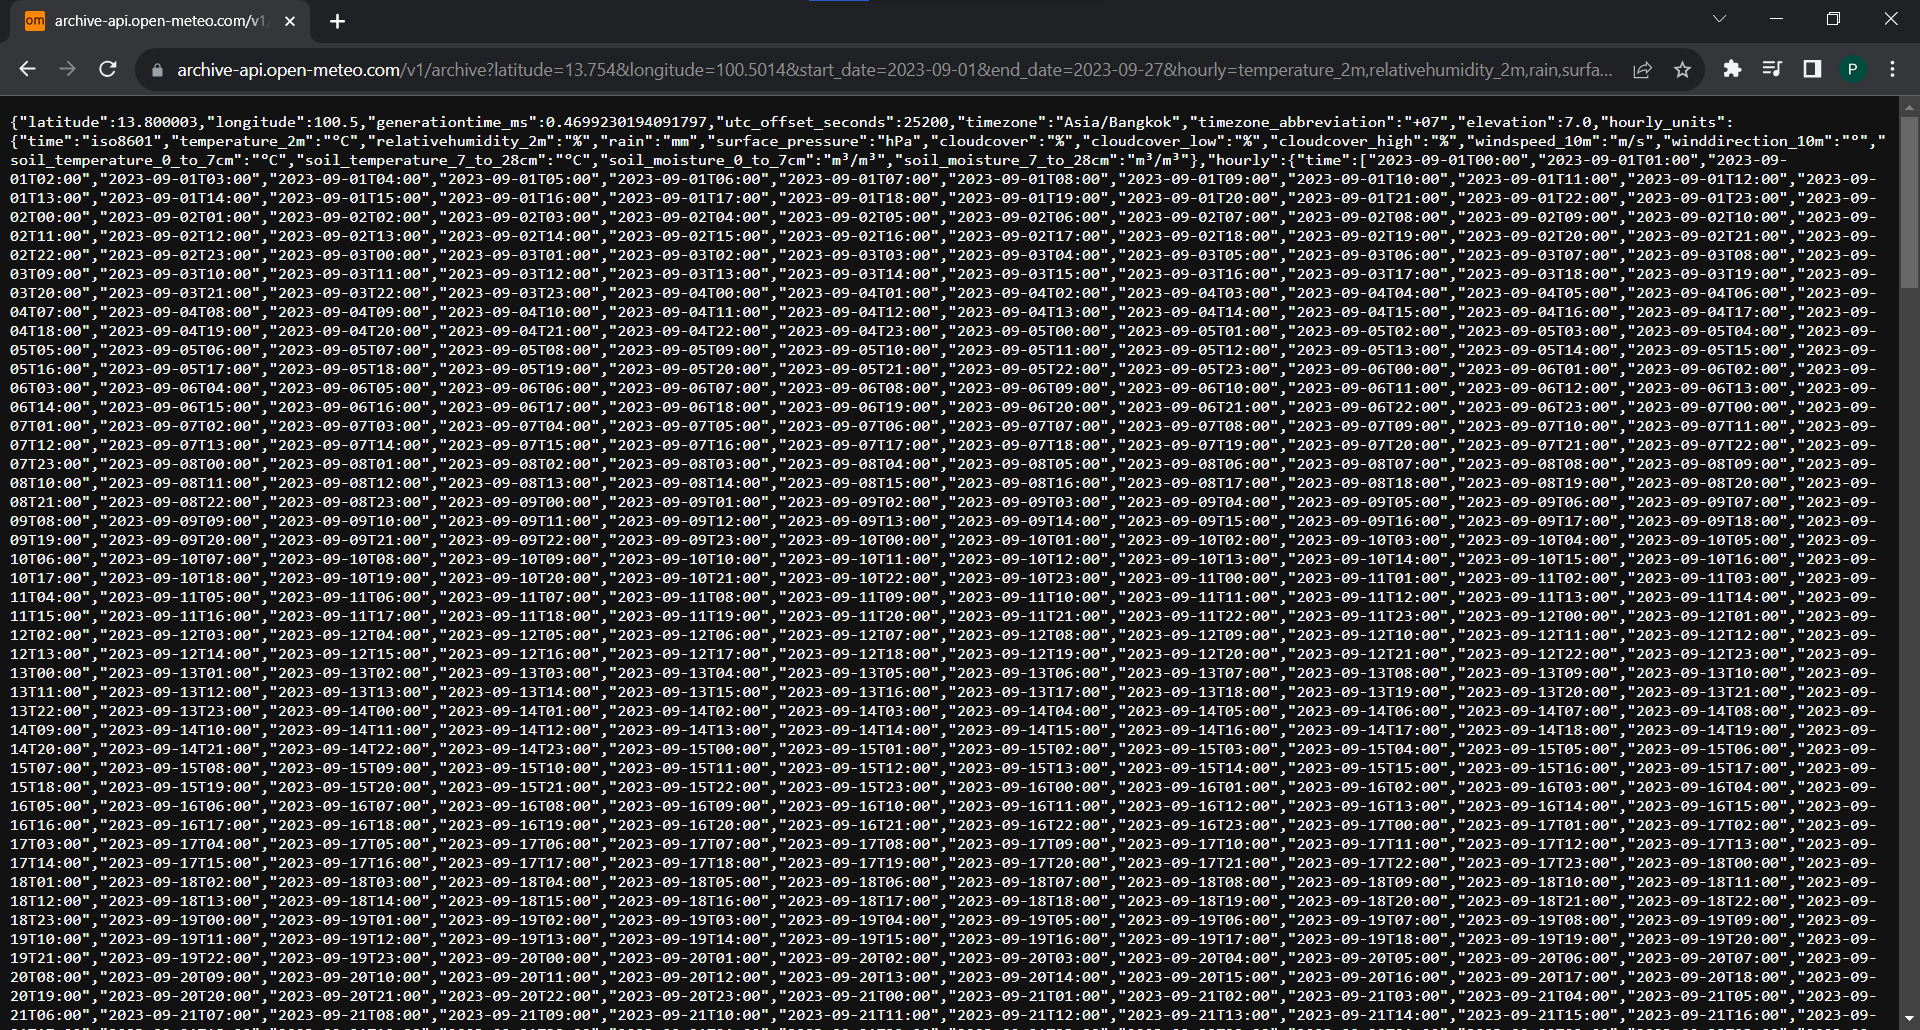

Ref: https://www.nbshare.io/notebook/713100085/How-To-Read-JSON-Data-Using-Python-Pandas/

In [3]:
# Datasource that we want to get the data
url = "https://archive-api.open-meteo.com/v1/archive?latitude=13.754&longitude=100.5014&start_date=2023-09-01&end_date=2023-09-27&hourly=temperature_2m,relativehumidity_2m,rain,surface_pressure,cloudcover,cloudcover_low,cloudcover_high,windspeed_10m,winddirection_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm&windspeed_unit=ms&timezone=Asia%2FBangkok"

# Use GET request to obtain the data
response = requests.get(url).json()

# You can try printing the response to see the result from GET request
# print(response)

In [4]:
# Show the list of features that we obtain
response["hourly"].keys()

dict_keys(['time', 'temperature_2m', 'relativehumidity_2m', 'rain', 'surface_pressure', 'cloudcover', 'cloudcover_low', 'cloudcover_high', 'windspeed_10m', 'winddirection_10m', 'soil_temperature_0_to_7cm', 'soil_temperature_7_to_28cm', 'soil_moisture_0_to_7cm', 'soil_moisture_7_to_28cm'])

In [5]:
# Put all those data into a dataframe
df = pd.DataFrame.from_dict(response["hourly"])

# Show the dataframe
df

,time,temperature_2m,relativehumidity_2m,rain,surface_pressure,cloudcover,cloudcover_low,cloudcover_high,windspeed_10m,winddirection_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm
0,2023-09-01T00:00,27.1,88,0.2,1008.1,90,0,100,0.64,231,28.9,31.2,0.335,0.317
1,2023-09-01T01:00,26.7,88,0.1,1007.3,90,1,100,0.92,229,28.6,31.1,0.336,0.317
2,2023-09-01T02:00,26.5,95,0.7,1006.9,90,1,100,1.08,236,28.5,31.0,0.346,0.317
3,2023-09-01T03:00,26.5,94,0.6,1006.3,90,1,100,1.14,232,28.4,30.9,0.354,0.317
4,2023-09-01T04:00,26.4,94,0.5,1006.1,88,0,100,1.44,236,28.3,30.8,0.362,0.317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,2023-09-27T19:00,27.4,86,0.0,1004.4,87,17,100,1.36,197,28.8,29.9,0.490,0.485
644,2023-09-27T20:00,27.2,87,0.0,1005.6,91,4,100,0.95,162,28.4,29.9,0.488,0.485
645,2023-09-27T21:00,27.1,88,0.0,1006.4,94,4,100,1.12,153,28.2,29.8,0.487,0.485
646,2023-09-27T22:00,26.9,89,0.0,1006.7,97,9,100,1.34,153,28.0,29.7,0.486,0.485


### Data Preprocessing

Ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

In [6]:
# As you can see from above, some values are missing
# We have to drop the missing value before computing other parameters
df.dropna(inplace=True)

# Show the dataframe after drop NaN
df

,time,temperature_2m,relativehumidity_2m,rain,surface_pressure,cloudcover,cloudcover_low,cloudcover_high,windspeed_10m,winddirection_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm
0,2023-09-01T00:00,27.1,88,0.2,1008.1,90,0,100,0.64,231,28.9,31.2,0.335,0.317
1,2023-09-01T01:00,26.7,88,0.1,1007.3,90,1,100,0.92,229,28.6,31.1,0.336,0.317
2,2023-09-01T02:00,26.5,95,0.7,1006.9,90,1,100,1.08,236,28.5,31.0,0.346,0.317
3,2023-09-01T03:00,26.5,94,0.6,1006.3,90,1,100,1.14,232,28.4,30.9,0.354,0.317
4,2023-09-01T04:00,26.4,94,0.5,1006.1,88,0,100,1.44,236,28.3,30.8,0.362,0.317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,2023-09-27T19:00,27.4,86,0.0,1004.4,87,17,100,1.36,197,28.8,29.9,0.490,0.485
644,2023-09-27T20:00,27.2,87,0.0,1005.6,91,4,100,0.95,162,28.4,29.9,0.488,0.485
645,2023-09-27T21:00,27.1,88,0.0,1006.4,94,4,100,1.12,153,28.2,29.8,0.487,0.485
646,2023-09-27T22:00,26.9,89,0.0,1006.7,97,9,100,1.34,153,28.0,29.7,0.486,0.485


### Histogram of features

Ref: https://www.geeksforgeeks.org/matplotlib-pyplot-hist-in-python/

Text(0.5, 1.0, 'Histrogram of Temperature (2 meters above ground) data')

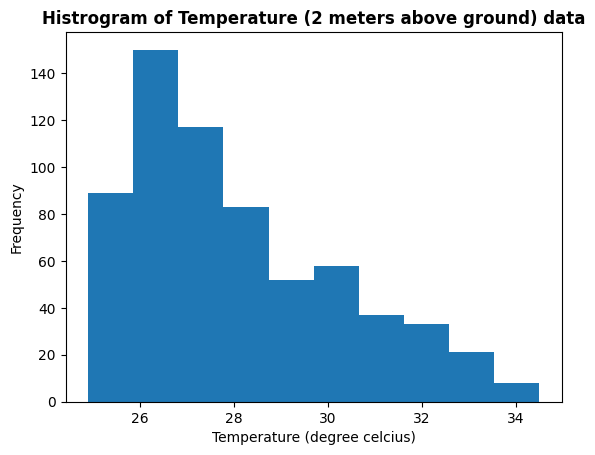

In [7]:
plt.hist(df["temperature_2m"])
plt.xlabel('Temperature (degree celcius)')
plt.ylabel('Frequency')
 
plt.title('Histrogram of Temperature (2 meters above ground) data',
          fontweight = "bold")

### Statistical Parameters

Ref:

https://medium.com/@kasiarachuta/basic-statistics-in-pandas-dataframe-594208074f85

https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/

In [8]:
# Compute some statistical parameters
print("Max Temperature: " + str(df["temperature_2m"].max()))
print("Min Temperature: " + str(df["temperature_2m"].min()))
print("Average Temperature:  " + str(round(df["temperature_2m"].mean(),2)))
print("Variance Temperature: " + str(round(df["temperature_2m"].var(),2)))

Max Temperature: 34.5
Min Temperature: 24.9
Average Temperature:  28.09
Variance Temperature: 4.87


In [9]:
# Correlation Matrix
# The value of the correlation coefficient is in the range of [-1,1]
df.corr()

,temperature_2m,relativehumidity_2m,rain,surface_pressure,cloudcover,cloudcover_low,cloudcover_high,windspeed_10m,winddirection_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm
temperature_2m,1.000000,-0.936477,-0.066102,-0.366336,-0.148859,0.356443,-0.325970,0.369189,0.258262,0.944052,0.347301,-0.305908,-0.197376
relativehumidity_2m,-0.936477,1.000000,0.120296,0.354780,0.105314,-0.274196,0.294489,-0.499326,-0.323813,-0.819813,-0.232970,0.392891,0.351357
rain,-0.066102,0.120296,1.000000,-0.111424,0.177938,0.159928,0.079837,-0.009366,-0.095761,0.091735,0.149411,0.238206,0.125258
surface_pressure,-0.366336,0.354780,-0.111424,1.000000,-0.011458,-0.094412,0.043013,-0.210639,0.031405,-0.414660,-0.519872,0.340307,0.323548
cloudcover,-0.148859,0.105314,0.177938,-0.011458,1.000000,0.240644,0.449278,0.144768,0.008345,-0.137505,-0.077300,0.045234,-0.095328
cloudcover_low,0.356443,-0.274196,0.159928,-0.094412,0.240644,1.000000,-0.101864,0.151037,0.037651,0.408102,0.179166,0.047714,0.160140
cloudcover_high,-0.325970,0.294489,0.079837,0.043013,0.449278,-0.101864,1.000000,-0.062861,-0.041168,-0.320548,-0.044273,0.141983,0.051736
windspeed_10m,0.369189,-0.499326,-0.009366,-0.210639,0.144768,0.151037,-0.062861,1.000000,0.230643,0.247399,-0.094442,-0.227209,-0.406217
winddirection_10m,0.258262,-0.323813,-0.095761,0.031405,0.008345,0.037651,-0.041168,0.230643,1.000000,0.161780,-0.047276,-0.188716,-0.229942
soil_temperature_0_to_7cm,0.944052,-0.819813,0.091735,-0.414660,-0.137505,0.408102,-0.320548,0.247399,0.161780,1.000000,0.503923,-0.256059,-0.084222


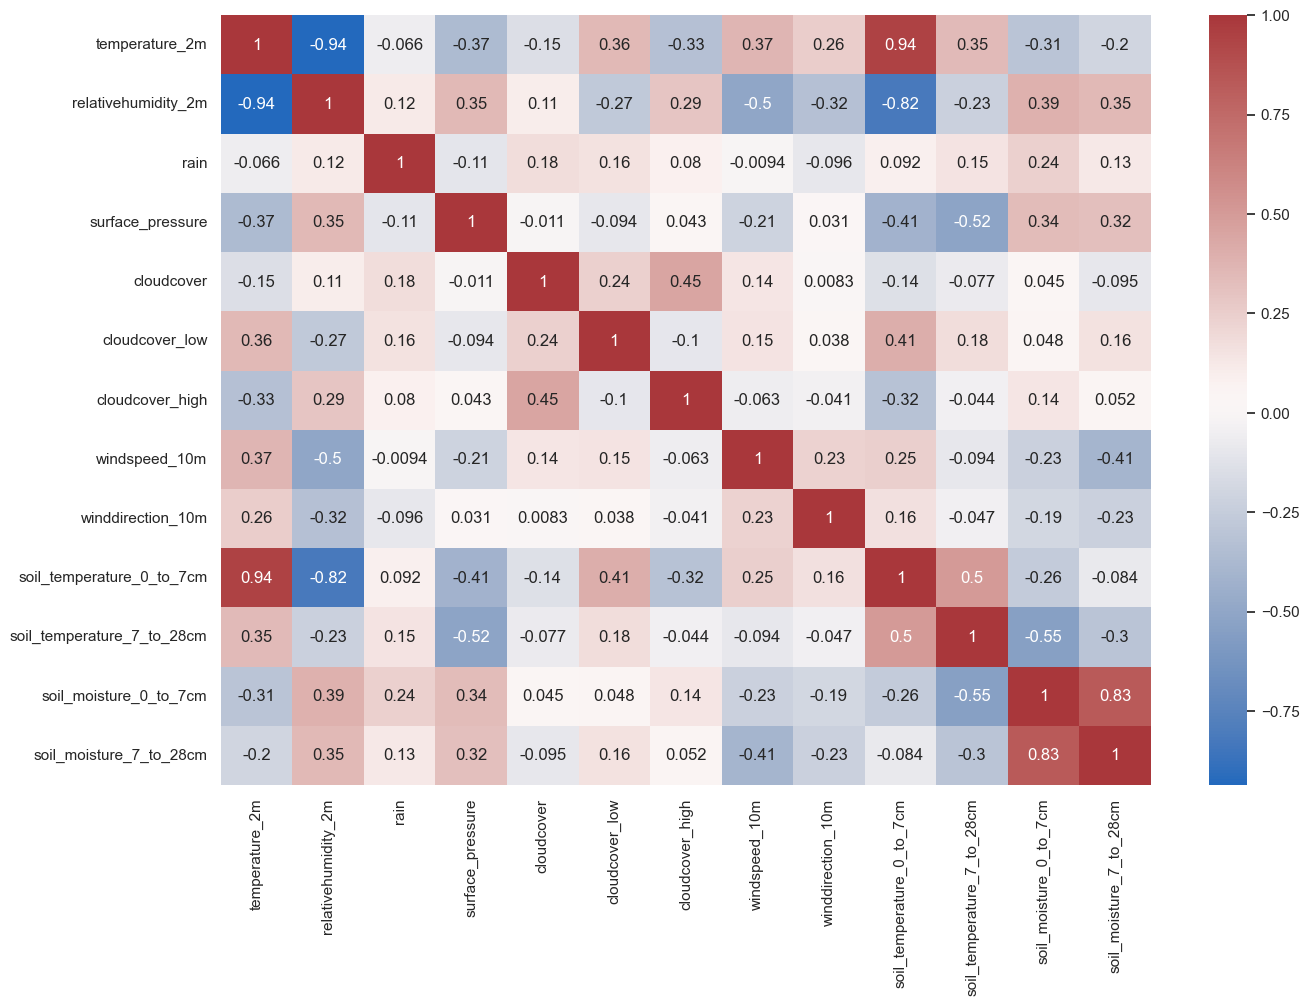

In [10]:
# Another way the show the correlation matrix

# plotting correlation heatmap
sb.set (rc = {'figure.figsize':(15, 10)})
dataplot = sb.heatmap(df.corr(), cmap="vlag", annot=True)

# displaying heatmap
plt.show()

ref name date purpose license

# Method 2 Web Scraping

## Data Gathering
Assume we want the table "Population of states, territories, divisions and region" from https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_population

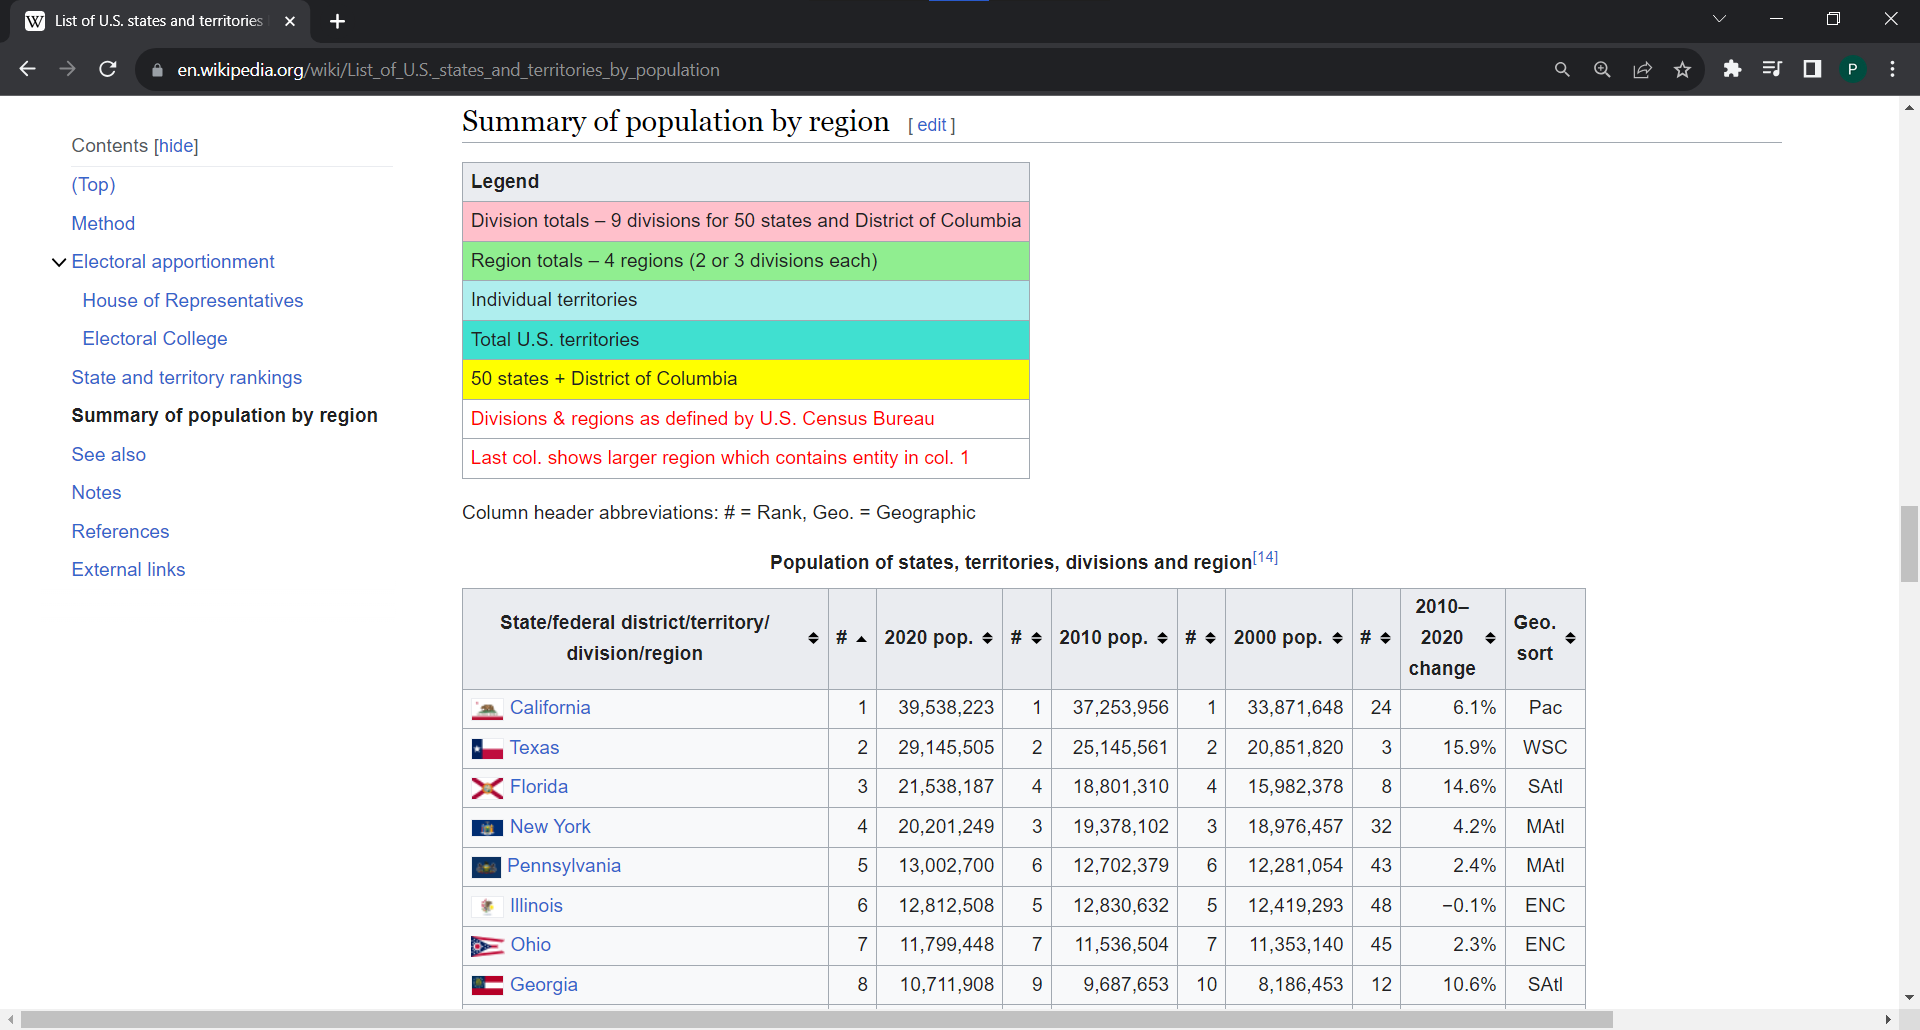

Ref: https://pbpython.com/pandas-html-table.html

In [11]:
# Datasource that we want to get the data
url = "https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_population"

# Extract table from website
table = pd.read_html(url, match="Population of states, territories, divisions and region")

In [12]:
# Check if they have only one related table
len(table)

1

In [13]:
# Make it to be dataframe
df = table[0]

# show some examples of data
df.head()

,State/federal district/territory/division/region,#,2020 pop.,#.1,2010 pop.,#.2,2000 pop.,#.3,2010–2020change,Geo. sort
0,Massachusetts,15,7029917,14,6547629,13,6349097,21,7.4%,NEng
1,Connecticut,29,3605944,29,3574097,29,3405565,47,0.9%,NEng
2,New Hampshire,41,1377529,42,1316470,41,1235786,30,4.6%,NEng
3,Maine,42,1362359,41,1328361,40,1274923,42,2.6%,NEng
4,Rhode Island,43,1097379,43,1052567,43,1048319,31,4.3%,NEng


In [14]:
# More information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 10 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   State/federal district/territory/division/region  73 non-null     object
 1   #                                                 73 non-null     object
 2   2020 pop.                                         73 non-null     object
 3   #.1                                               73 non-null     object
 4   2010 pop.                                         73 non-null     object
 5   #.2                                               73 non-null     object
 6   2000 pop.                                         73 non-null     object
 7   #.3                                               73 non-null     object
 8   2010–2020change                                   73 non-null     object
 9   Geo. sort                         

## Try it by yourself
After this, you can try preprocessing and computing statistical parameters by yourself (see examples from Method 1)

# Other Methods
You may download a CSV file from the website and then upload it to your workspace before prepocessing and computing the statistical values.